In [1]:
import pandas as pd

from src.model.model import RainTimeSeriesModel
from src.utils.args import InferArguments
from src.utils.plot import plot

In [2]:
target_col = "y"
time_col = "ds"
exog_cols = []
level = 0.9
freq = "H"
horizon = 128

file_path = "data/electricity.csv"
df = pd.read_csv(file_path)

unique_id = "BE" # BE DE FR NP

be = df[df["unique_id"] == unique_id]
be_ground_truth = be.iloc[-horizon:]
be = be.iloc[:-horizon]

In [3]:
model_args = InferArguments()
model = RainTimeSeriesModel(model_args)

## without prediction interval

In [4]:
prediction = model.predict(
    data=be,
    time_col=time_col,
    target_col=target_col,
    exog_cols=exog_cols,
    freq=freq,
    horizon=horizon,
)
prediction.shape

The length of inputs is greater than the maximum number, only the tail 512 points will be used.


(1, 128)

## visulazation result without prediction interval

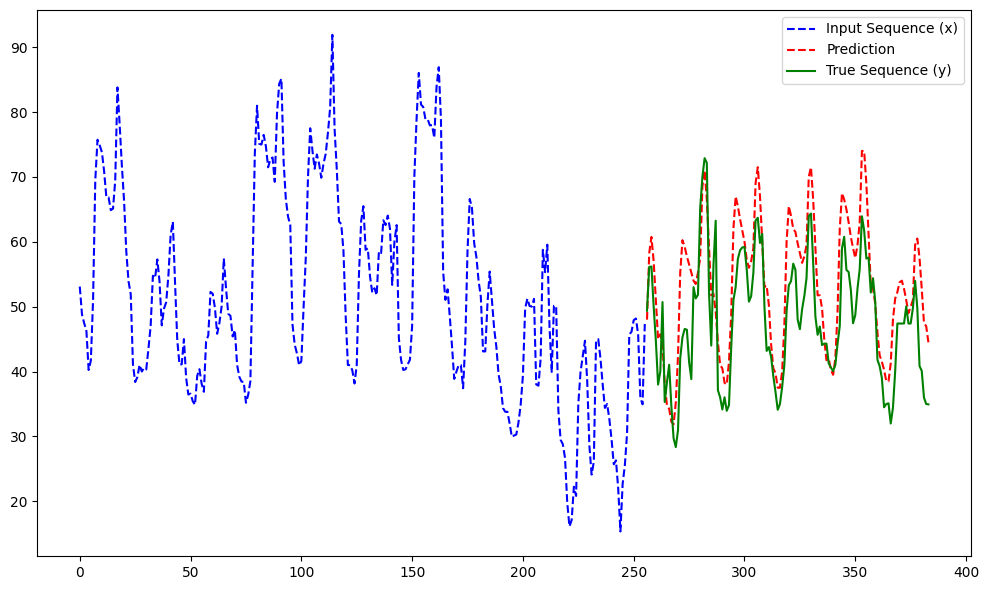

In [5]:
plot(data=be, ground_truth=be_ground_truth, target_col=target_col, prediction=prediction)

## with prediction interval

In [6]:
prediction, boundaries = model.predict(
    data=be,
    time_col=time_col,
    target_col=target_col,
    exog_cols=exog_cols,
    freq=freq,
    horizon=horizon,
    level=level,
)
prediction.shape, boundaries.shape

The length of inputs is greater than the maximum number, only the tail 1664 points will be used.


((1, 128), (1, 2, 128))

## visulazation result with prediction interval

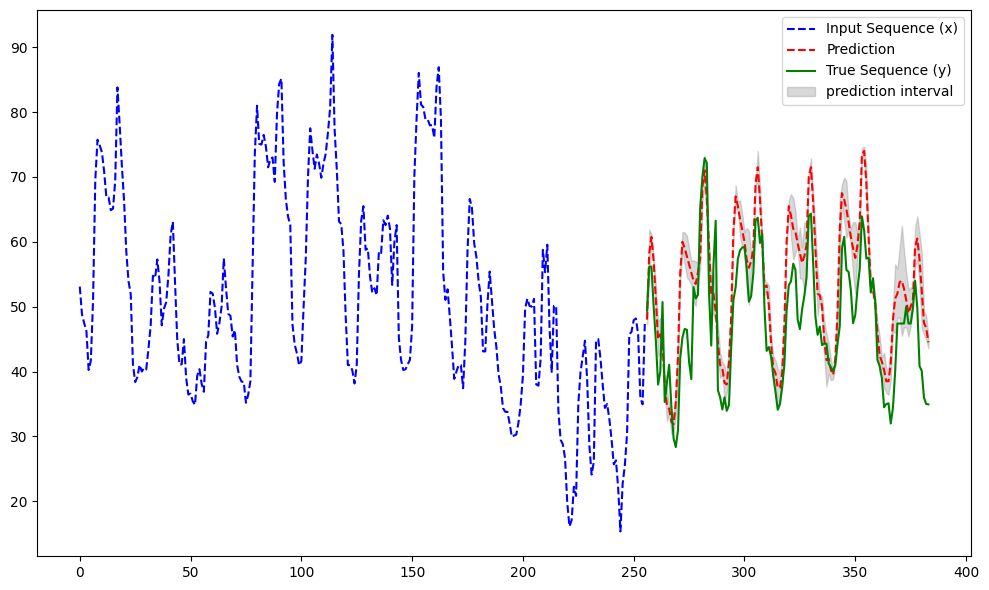

In [7]:
plot(data=be, ground_truth=be_ground_truth, target_col=target_col, prediction=prediction, boundaries=boundaries)